In [402]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

id  bone_length  rotting_flesh  hair_length  has_soul  color    type
0   0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul
1   1     0.575560       0.425868     0.531401  0.439899  green  Goblin
2   2     0.467875       0.354330     0.811616  0.791225  black   Ghoul
3   4     0.776652       0.508723     0.636766  0.884464  black   Ghoul
4   5     0.566117       0.875862     0.418594  0.636438  green   Ghost


# Any nulls/empty fields?

In [403]:
print(train.shape)
print(test.shape)

(371, 7)
(529, 6)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126dbeb70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1229fd6a0>]], dtype=object)

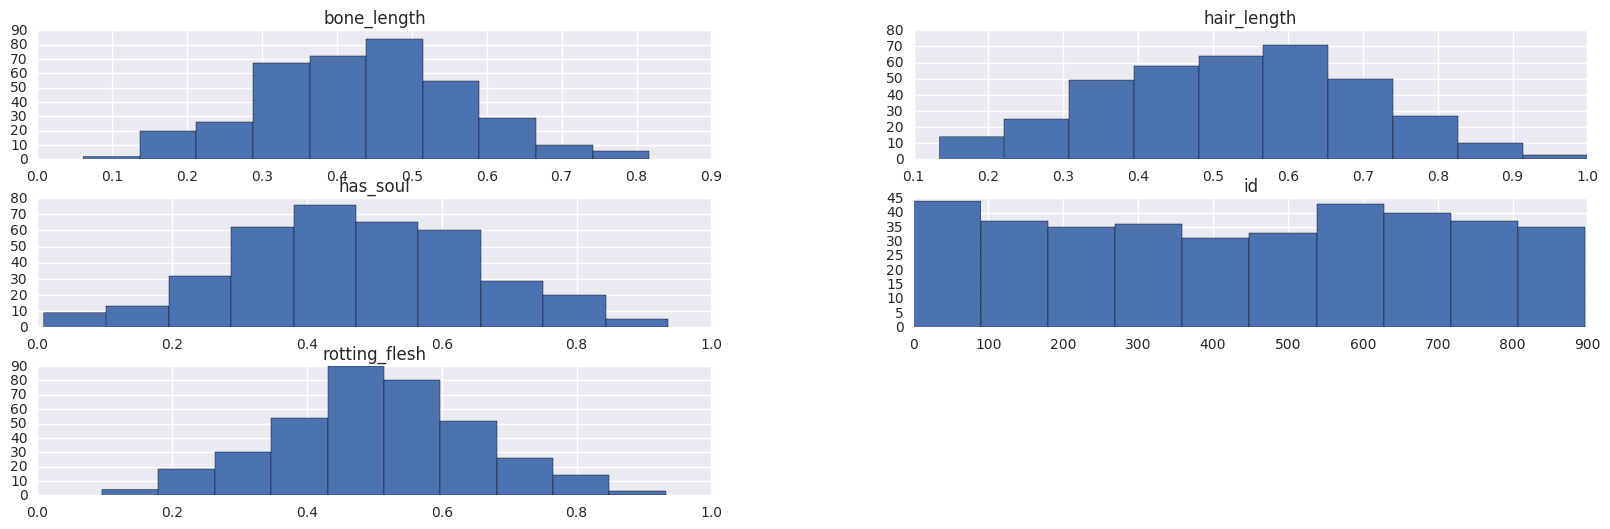

In [404]:
train.hist()
#Pretty normal

In [344]:
continuous_var=[]
for i in train.columns:
    if train[i].dtype=='float64':
        continuous_var.append(i)
      
print(continuous_var)
print(train.dtypes)

['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']
id                 int64
bone_length      float64
rotting_flesh    float64
hair_length      float64
has_soul         float64
color             object
type              object
dtype: object


In [345]:
type_dict={'Ghoul':0,
          'Goblin':1,
          'Ghost':2}

reverse_dict={
           0:'Ghoul',
           1:'Goblin',
           2:'Ghost'
}

train['type_con']=train['type'].apply(lambda x:type_dict[x])

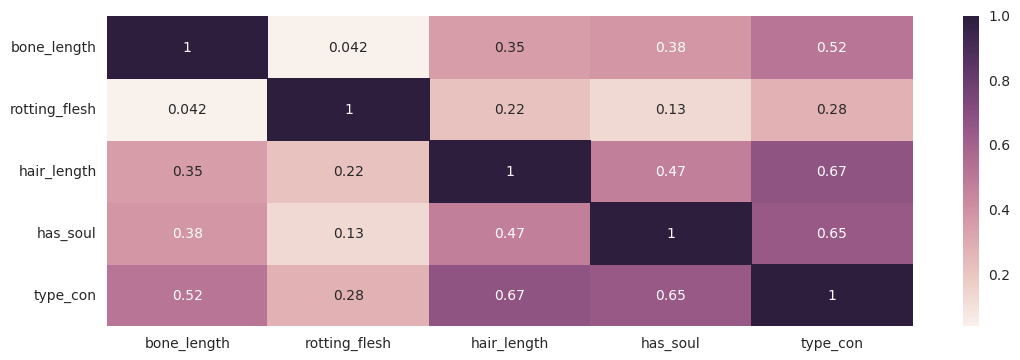

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6
continuous_var.append('type_con')
correlationMatrix=train.loc[:,continuous_var].corr().abs()
plt.subplots(figsize=(13, 4))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()


#So has_soul,hair_length,bone_length

In [347]:
set(train['id']).intersection(set(test['id']))

set()

In [348]:
train.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
type_con         0
dtype: int64

In [296]:
#Any ids in train and test?

pd.Series(list(set(train.id).intersection(set(test.id))))

Series([], dtype: float64)

# Type distribution

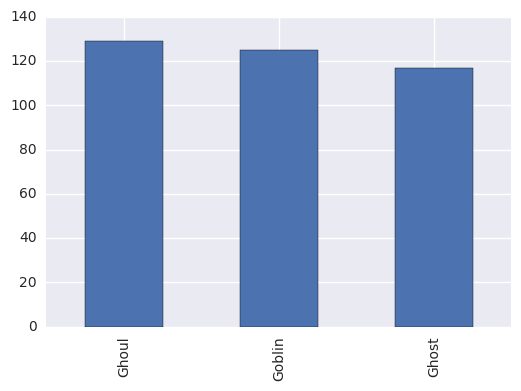

In [114]:
%matplotlib inline
from ggplot import *
train.type.value_counts().plot(kind='bar')

# BONE_LENGTH DISTRIBUTION BY TYPE
Ghouls have more bone lengh followed by goblin and ghost

In [115]:
train.boxplot(column='bone_length',by='type')


In [116]:
train.groupby('type').bone_length.median()

type
Ghost     0.340442
Ghoul     0.515397
Goblin    0.430797
Name: bone_length, dtype: float64

# Rotting_flesh DISTRIBUTION BY TYPE
Ghost has rotting flesh while ghoul and goblin dont which is expected

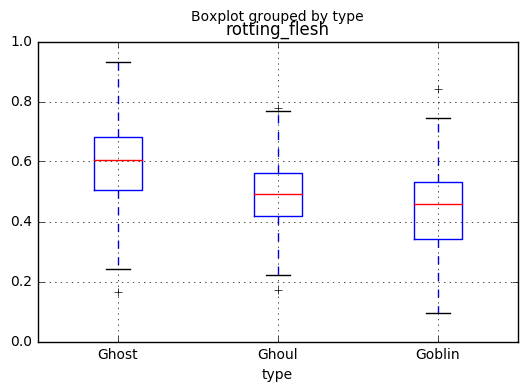

In [8]:
train.boxplot(column='rotting_flesh',by='type')


# Hair_Length distribution
Ghoul has more hairlength than goblin and ghost

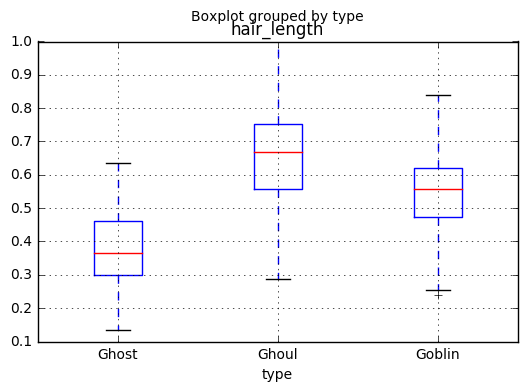

In [9]:
train.boxplot(column='hair_length',by='type')

# Has_soul distribution
Ghoul and Goblin has soul while ghost dont.

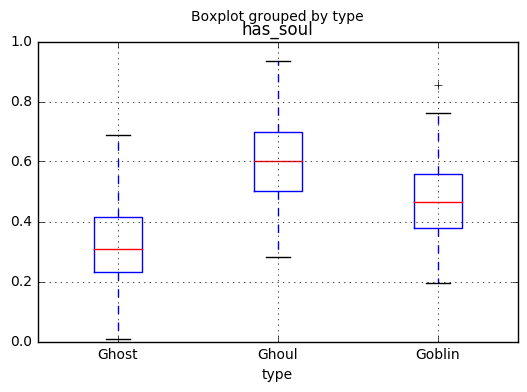

In [10]:
train.boxplot(column='has_soul',by='type')

In [11]:

import seaborn as sns
sns.factorplot("type", col="color", col_wrap=4, data=train, kind="count", size=2.4, aspect=.8)



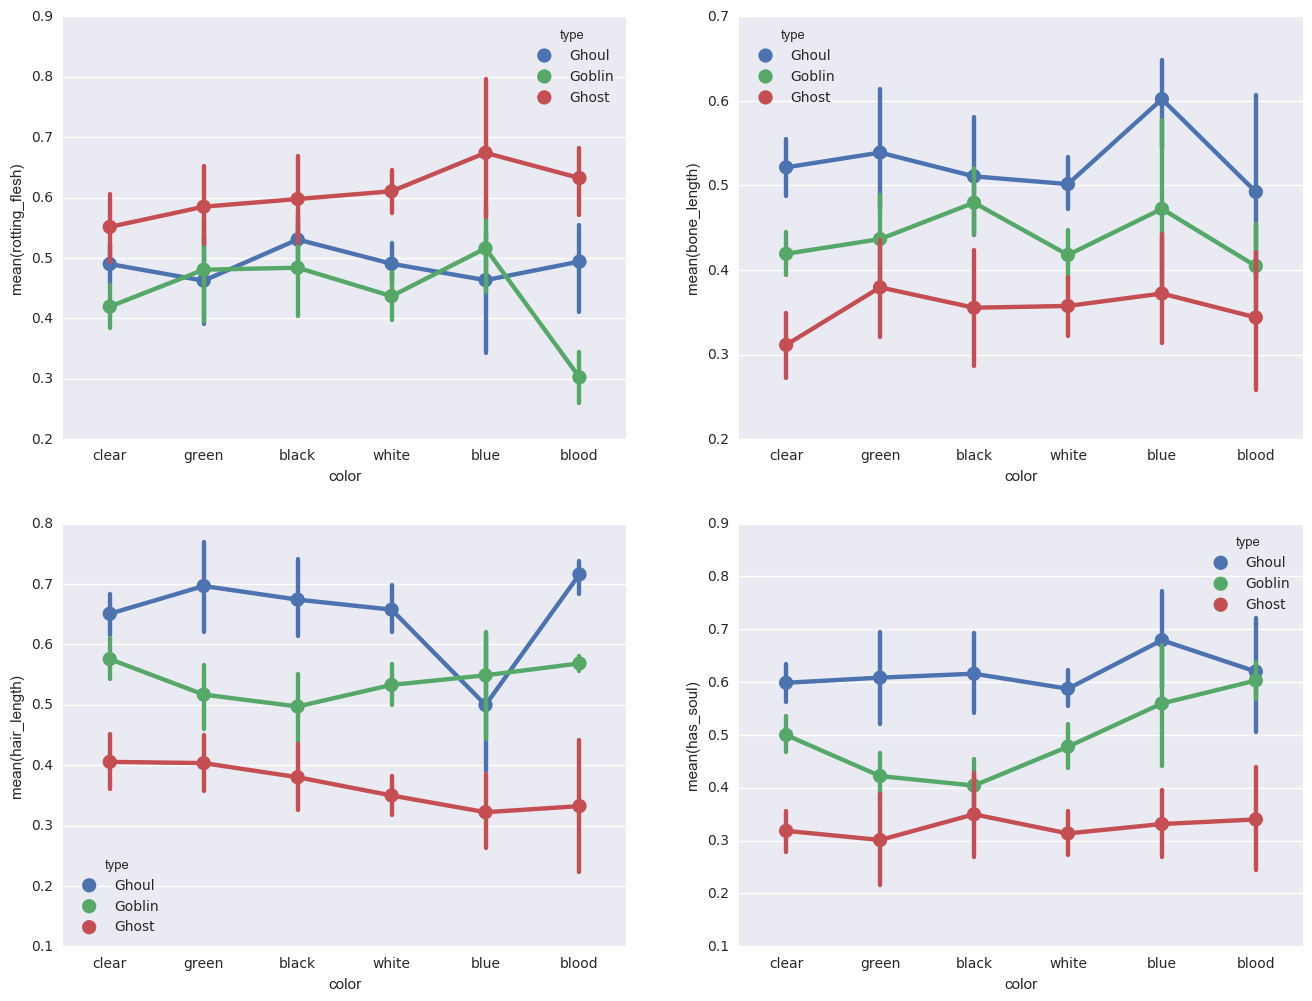

In [12]:
#Does color help
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize = (16, 12))
sns.pointplot(x="color", y="rotting_flesh", hue="type", data=train, ax = ax[0, 0])
sns.pointplot(x="color", y="bone_length", hue="type", data=train, ax = ax[0, 1])
sns.pointplot(x="color", y="hair_length", hue="type", data=train, ax = ax[1, 0])
sns.pointplot(x="color", y="has_soul", hue="type", data=train, ax = ax[1, 1])

In [13]:
df=train.corr()*100
df

id  bone_length  rotting_flesh  hair_length    has_soul
id             100.000000    -6.275899      -0.753916     7.647458   10.005379
bone_length     -6.275899   100.000000      -4.171551    35.388057   38.167462
rotting_flesh   -0.753916    -4.171551     100.000000   -22.035316  -13.205058
hair_length      7.647458    35.388057     -22.035316   100.000000   47.483540
has_soul        10.005379    38.167462     -13.205058    47.483540  100.000000

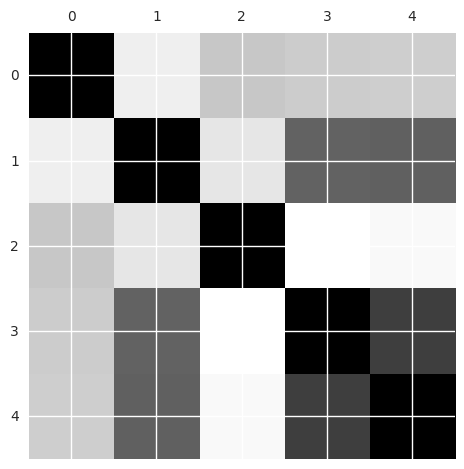

In [14]:
import matplotlib

import matplotlib.pyplot as plt
plt.matshow(df.corr())

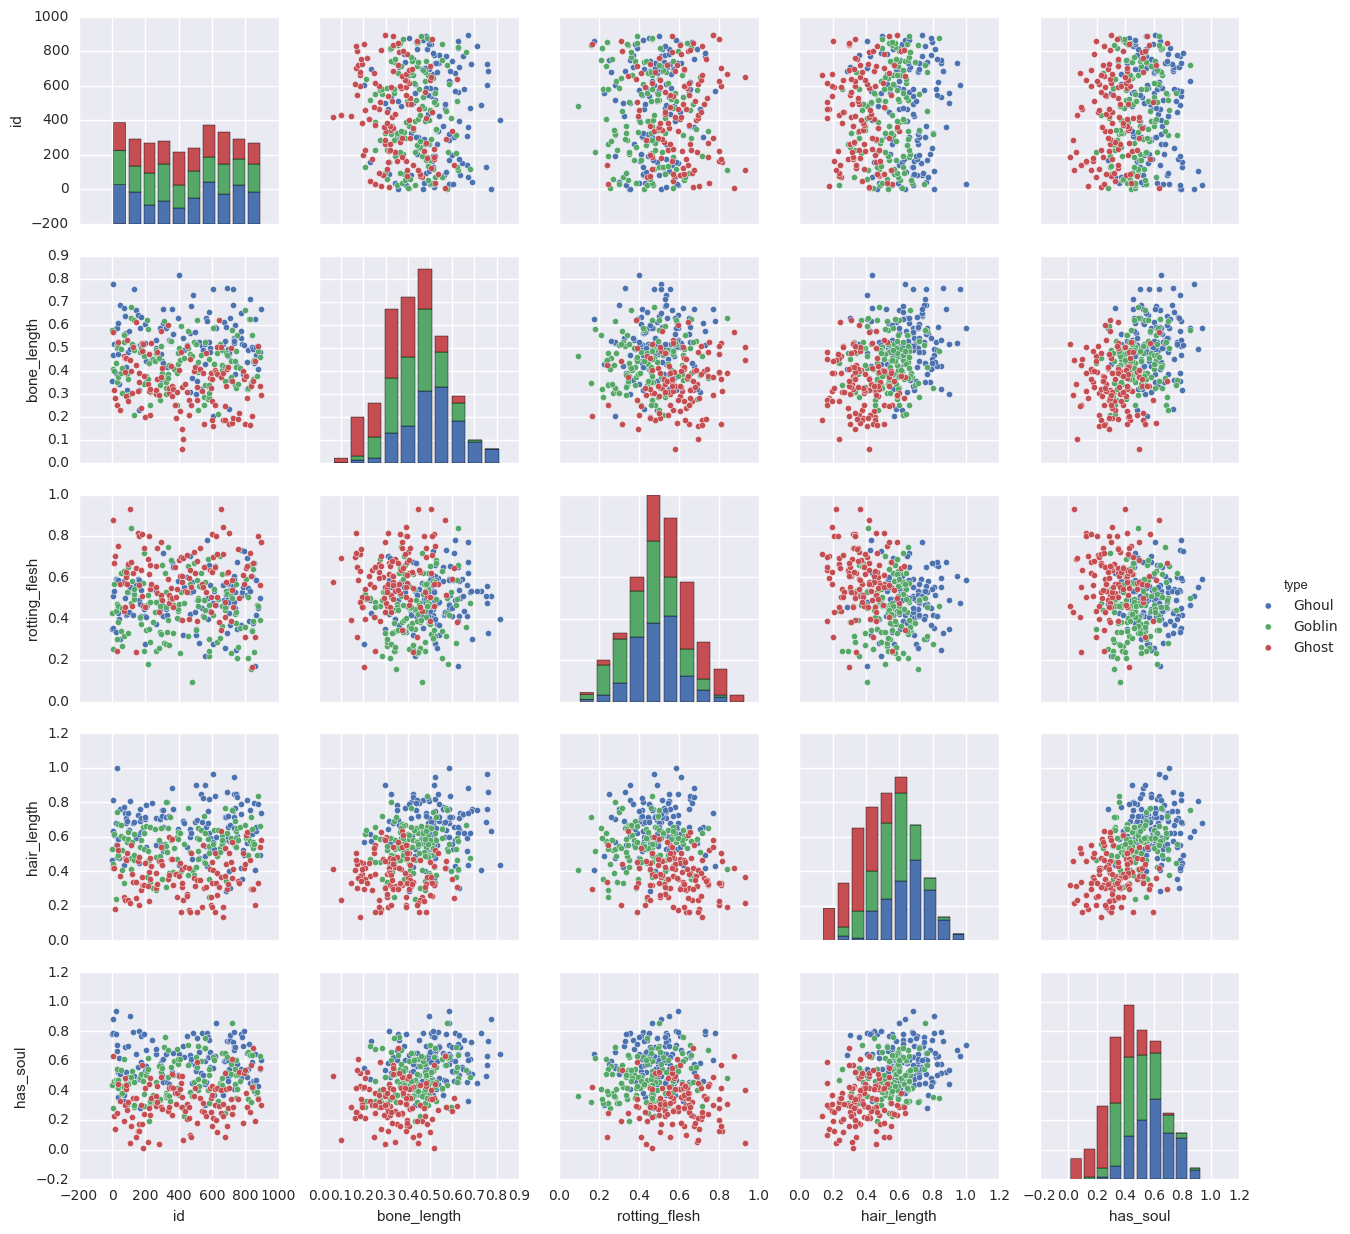

In [15]:
import seaborn as sns
sns.set()

sns.pairplot(train,hue="type")
#hmmm nomal dist

In [16]:
train.bone_length.describe()

count    371.000000
mean       0.434160
std        0.132833
min        0.061032
25%        0.340006
50%        0.434891
75%        0.517223
max        0.817001
Name: bone_length, dtype: float64

In [18]:
train.head()

id  bone_length  rotting_flesh  hair_length  has_soul  color    type  \
0   0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul   
1   1     0.575560       0.425868     0.531401  0.439899  green  Goblin   
2   2     0.467875       0.354330     0.811616  0.791225  black   Ghoul   
3   4     0.776652       0.508723     0.636766  0.884464  black   Ghoul   
4   5     0.566117       0.875862     0.418594  0.636438  green   Ghost   

   black  blood  blue  clear  green  white  
0    0.0    0.0   0.0    1.0    0.0    0.0  
1    0.0    0.0   0.0    0.0    1.0    0.0  
2    1.0    0.0   0.0    0.0    0.0    0.0  
3    1.0    0.0   0.0    0.0    0.0    0.0  
4    0.0    0.0   0.0    0.0    1.0    0.0

In [19]:
test.head()

id  bone_length  rotting_flesh  hair_length  has_soul  color  black  blood  \
0   3     0.471774       0.387937     0.706087  0.698537  black    1.0    0.0   
1   6     0.427332       0.645024     0.565558  0.451462  white    0.0    0.0   
2   9     0.549602       0.491931     0.660387  0.449809  black    1.0    0.0   
3  10     0.638095       0.682867     0.471409  0.356924  white    0.0    0.0   
4  13     0.361762       0.583997     0.377256  0.276364  black    1.0    0.0   

   blue  clear  green  white  
0   0.0    0.0    0.0    0.0  
1   0.0    0.0    0.0    1.0  
2   0.0    0.0    0.0    0.0  
3   0.0    0.0    0.0    1.0  
4   0.0    0.0    0.0    0.0

In [349]:
#Dummy variabls for color 
dummy_df=pd.get_dummies(train.color)
train=train.merge(dummy_df,left_index=True,right_index=True)
test=test.merge(pd.get_dummies(test.color),left_index=True,right_index=True)
train=train.drop('color',axis=1)
test=test.drop('color',axis=1)

train.head()

id  bone_length  rotting_flesh  hair_length  has_soul    type  type_con  \
0   0     0.354512       0.350839     0.465761  0.781142   Ghoul         0   
1   1     0.575560       0.425868     0.531401  0.439899  Goblin         1   
2   2     0.467875       0.354330     0.811616  0.791225   Ghoul         0   
3   4     0.776652       0.508723     0.636766  0.884464   Ghoul         0   
4   5     0.566117       0.875862     0.418594  0.636438   Ghost         2   

   black  blood  blue  clear  green  white  
0    0.0    0.0   0.0    1.0    0.0    0.0  
1    0.0    0.0   0.0    0.0    1.0    0.0  
2    1.0    0.0   0.0    0.0    0.0    0.0  
3    1.0    0.0   0.0    0.0    0.0    0.0  
4    0.0    0.0   0.0    0.0    1.0    0.0

In [350]:
cols=[i for i in train.columns if i!='type' and i!='color' and i!='id' and i!='type_con']
from sklearn.preprocessing import PolynomialFeatures

def createInteractionFeatures(data):

    poly=PolynomialFeatures(degree=2,interaction_only=True)
    df = poly.fit_transform(data)
    target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(data.columns,p) for p in poly.powers_]]
    interaction=pd.DataFrame(df)
    interaction.columns=target_feature_names
    return interaction

interaction=createInteractionFeatures(train.loc[:,cols])
interaction_test=createInteractionFeatures(test.loc[:,cols])


In [351]:
interaction.head()

bone_length^1  rotting_flesh^1  hair_length^1  has_soul^1  black^1  \
0  1.0       0.354512         0.350839       0.465761    0.781142      0.0   
1  1.0       0.575560         0.425868       0.531401    0.439899      0.0   
2  1.0       0.467875         0.354330       0.811616    0.791225      1.0   
3  1.0       0.776652         0.508723       0.636766    0.884464      1.0   
4  1.0       0.566117         0.875862       0.418594    0.636438      0.0   

   blood^1  blue^1  clear^1  green^1       ...         blood^1xblue^1  \
0      0.0     0.0      1.0      0.0       ...                    0.0   
1      0.0     0.0      0.0      1.0       ...                    0.0   
2      0.0     0.0      0.0      0.0       ...                    0.0   
3      0.0     0.0      0.0      0.0       ...                    0.0   
4      0.0     0.0      0.0      1.0       ...                    0.0   

   blood^1xclear^1  blood^1xgreen^1  blood^1xwhite^1  blue^1xclear^1  \
0              0.0              0.0              0.0             0.0   
1              0.0              0.0              0.0             0.0   
2              0.0              0.0              0.0             0.0   
3              0.0              0.0              0.0             0.0   
4              0.0              0.0              0.0             0.0   

   blue^1xgreen^1  blue^1xwhite^1  clear^1xgreen^1  clear^1xwhite^1  \
0             0.0             0.0              0.0              0.0   
1             0.0             0.0              0.0              0.0   
2             0.0             0.0              0.0              0.0   
3             0.0             0.0              0.0              0.0   
4             0.0             0.0              0.0              0.0   

   green^1xwhite^1  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 56 columns]

In [352]:
train_plus_interaction=train.loc[:,['id','type','type_con']].merge(interaction,left_index=True,right_index=True)
train_plus_interaction.head()

id    type  type_con       bone_length^1  rotting_flesh^1  hair_length^1  \
0   0   Ghoul         0  1.0       0.354512         0.350839       0.465761   
1   1  Goblin         1  1.0       0.575560         0.425868       0.531401   
2   2   Ghoul         0  1.0       0.467875         0.354330       0.811616   
3   4   Ghoul         0  1.0       0.776652         0.508723       0.636766   
4   5   Ghost         2  1.0       0.566117         0.875862       0.418594   

   has_soul^1  black^1  blood^1       ...         blood^1xblue^1  \
0    0.781142      0.0      0.0       ...                    0.0   
1    0.439899      0.0      0.0       ...                    0.0   
2    0.791225      1.0      0.0       ...                    0.0   
3    0.884464      1.0      0.0       ...                    0.0   
4    0.636438      0.0      0.0       ...                    0.0   

   blood^1xclear^1  blood^1xgreen^1  blood^1xwhite^1  blue^1xclear^1  \
0              0.0              0.0              0.0             0.0   
1              0.0              0.0              0.0             0.0   
2              0.0              0.0              0.0             0.0   
3              0.0              0.0              0.0             0.0   
4              0.0              0.0              0.0             0.0   

   blue^1xgreen^1  blue^1xwhite^1  clear^1xgreen^1  clear^1xwhite^1  \
0             0.0             0.0              0.0              0.0   
1             0.0             0.0              0.0              0.0   
2             0.0             0.0              0.0              0.0   
3             0.0             0.0              0.0              0.0   
4             0.0             0.0              0.0              0.0   

   green^1xwhite^1  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 59 columns]

In [353]:
test_plus_interaction=test.loc[:,['id']].merge(interaction_test,left_index=True,right_index=True)
test_plus_interaction.head()

id       bone_length^1  rotting_flesh^1  hair_length^1  has_soul^1  \
0   3  1.0       0.471774         0.387937       0.706087    0.698537   
1   6  1.0       0.427332         0.645024       0.565558    0.451462   
2   9  1.0       0.549602         0.491931       0.660387    0.449809   
3  10  1.0       0.638095         0.682867       0.471409    0.356924   
4  13  1.0       0.361762         0.583997       0.377256    0.276364   

   black^1  blood^1  blue^1  clear^1       ...         blood^1xblue^1  \
0      1.0      0.0     0.0      0.0       ...                    0.0   
1      0.0      0.0     0.0      0.0       ...                    0.0   
2      1.0      0.0     0.0      0.0       ...                    0.0   
3      0.0      0.0     0.0      0.0       ...                    0.0   
4      1.0      0.0     0.0      0.0       ...                    0.0   

   blood^1xclear^1  blood^1xgreen^1  blood^1xwhite^1  blue^1xclear^1  \
0              0.0              0.0              0.0             0.0   
1              0.0              0.0              0.0             0.0   
2              0.0              0.0              0.0             0.0   
3              0.0              0.0              0.0             0.0   
4              0.0              0.0              0.0             0.0   

   blue^1xgreen^1  blue^1xwhite^1  clear^1xgreen^1  clear^1xwhite^1  \
0             0.0             0.0              0.0              0.0   
1             0.0             0.0              0.0              0.0   
2             0.0             0.0              0.0              0.0   
3             0.0             0.0              0.0              0.0   
4             0.0             0.0              0.0              0.0   

   green^1xwhite^1  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 57 columns]

In [354]:
cols=[i for i in train_plus_interaction if i!='id' and i!='']
cols1=[i for i in test_plus_interaction if i!='id'   and i!='']

train_final=train_plus_interaction.loc[:,cols]
test_final=test_plus_interaction.loc[:,cols1]
train_final.head()

type  type_con  bone_length^1  rotting_flesh^1  hair_length^1  \
0   Ghoul         0       0.354512         0.350839       0.465761   
1  Goblin         1       0.575560         0.425868       0.531401   
2   Ghoul         0       0.467875         0.354330       0.811616   
3   Ghoul         0       0.776652         0.508723       0.636766   
4   Ghost         2       0.566117         0.875862       0.418594   

   has_soul^1  black^1  blood^1  blue^1  clear^1       ...         \
0    0.781142      0.0      0.0     0.0      1.0       ...          
1    0.439899      0.0      0.0     0.0      0.0       ...          
2    0.791225      1.0      0.0     0.0      0.0       ...          
3    0.884464      1.0      0.0     0.0      0.0       ...          
4    0.636438      0.0      0.0     0.0      0.0       ...          

   blood^1xblue^1  blood^1xclear^1  blood^1xgreen^1  blood^1xwhite^1  \
0             0.0              0.0              0.0              0.0   
1             0.0              0.0              0.0              0.0   
2             0.0              0.0              0.0              0.0   
3             0.0              0.0              0.0              0.0   
4             0.0              0.0              0.0              0.0   

   blue^1xclear^1  blue^1xgreen^1  blue^1xwhite^1  clear^1xgreen^1  \
0             0.0             0.0             0.0              0.0   
1             0.0             0.0             0.0              0.0   
2             0.0             0.0             0.0              0.0   
3             0.0             0.0             0.0              0.0   
4             0.0             0.0             0.0              0.0   

   clear^1xwhite^1  green^1xwhite^1  
0              0.0              0.0  
1              0.0              0.0  
2              0.0              0.0  
3              0.0              0.0  
4              0.0              0.0  

[5 rows x 57 columns]

In [355]:
train_final['id']=train['id']
train=train_final
test_final['id']=test['id']

test=test_final


In [356]:
test.head()

bone_length^1  rotting_flesh^1  hair_length^1  has_soul^1  black^1  \
0       0.471774         0.387937       0.706087    0.698537      1.0   
1       0.427332         0.645024       0.565558    0.451462      0.0   
2       0.549602         0.491931       0.660387    0.449809      1.0   
3       0.638095         0.682867       0.471409    0.356924      0.0   
4       0.361762         0.583997       0.377256    0.276364      1.0   

   blood^1  blue^1  clear^1  green^1  white^1 ...  blood^1xclear^1  \
0      0.0     0.0      0.0      0.0      0.0 ...              0.0   
1      0.0     0.0      0.0      0.0      1.0 ...              0.0   
2      0.0     0.0      0.0      0.0      0.0 ...              0.0   
3      0.0     0.0      0.0      0.0      1.0 ...              0.0   
4      0.0     0.0      0.0      0.0      0.0 ...              0.0   

   blood^1xgreen^1  blood^1xwhite^1  blue^1xclear^1  blue^1xgreen^1  \
0              0.0              0.0             0.0             0.0   
1              0.0              0.0             0.0             0.0   
2              0.0              0.0             0.0             0.0   
3              0.0              0.0             0.0             0.0   
4              0.0              0.0             0.0             0.0   

   blue^1xwhite^1  clear^1xgreen^1  clear^1xwhite^1  green^1xwhite^1  id  
0             0.0              0.0              0.0              0.0   3  
1             0.0              0.0              0.0              0.0   6  
2             0.0              0.0              0.0              0.0   9  
3             0.0              0.0              0.0              0.0  10  
4             0.0              0.0              0.0              0.0  13  

[5 rows x 56 columns]

In [357]:
print(train.shape)
print(test.shape)

(371, 58)
(529, 56)


In [380]:
train.head()

type  type_con  bone_length^1  rotting_flesh^1  hair_length^1  \
0   Ghoul         0       0.354512         0.350839       0.465761   
1  Goblin         1       0.575560         0.425868       0.531401   
2   Ghoul         0       0.467875         0.354330       0.811616   
3   Ghoul         0       0.776652         0.508723       0.636766   
4   Ghost         2       0.566117         0.875862       0.418594   

   has_soul^1  black^1  blood^1  blue^1  clear^1  green^1  white^1  \
0    0.781142      0.0      0.0     0.0      1.0      0.0      0.0   
1    0.439899      0.0      0.0     0.0      0.0      1.0      0.0   
2    0.791225      1.0      0.0     0.0      0.0      0.0      0.0   
3    0.884464      1.0      0.0     0.0      0.0      0.0      0.0   
4    0.636438      0.0      0.0     0.0      0.0      1.0      0.0   

   bone_length^1xrotting_flesh^1  bone_length^1xhair_length^1  \
0                       0.124377                     0.165118   
1                       0.245113                     0.305853   
2                       0.165783                     0.379735   
3                       0.395101                     0.494546   
4                       0.495840                     0.236973   

   bone_length^1xhas_soul^1  bone_length^1xblack^1  bone_length^1xblood^1  \
0                  0.276924               0.000000                    0.0   
1                  0.253188               0.000000                    0.0   
2                  0.370195               0.467875                    0.0   
3                  0.686921               0.776652                    0.0   
4                  0.360298               0.000000                    0.0   

   bone_length^1xblue^1  bone_length^1xclear^1  bone_length^1xgreen^1  \
0                   0.0               0.354512               0.000000   
1                   0.0               0.000000               0.575560   
2                   0.0               0.000000               0.000000   
3                   0.0               0.000000               0.000000   
4                   0.0               0.000000               0.566117   

   bone_length^1xwhite^1  rotting_flesh^1xhair_length^1  \
0                    0.0                       0.163407   
1                    0.0                       0.226307   
2                    0.0                       0.287580   
3                    0.0                       0.323937   
4                    0.0                       0.366630   

   rotting_flesh^1xhas_soul^1  rotting_flesh^1xblack^1  \
0                    0.274055                 0.000000   
1                    0.187339                 0.000000   
2                    0.280355                 0.354330   
3                    0.449947                 0.508723   
4                    0.557432                 0.000000   

   rotting_flesh^1xblood^1  rotting_flesh^1xblue^1  rotting_flesh^1xclear^1  \
0                      0.0                     0.0                 0.350839   
1                      0.0                     0.0                 0.000000   
2                      0.0                     0.0                 0.000000   
3                      0.0                     0.0                 0.000000   
4                      0.0                     0.0                 0.000000   

   rotting_flesh^1xgreen^1  rotting_flesh^1xwhite^1  hair_length^1xhas_soul^1  \
0                 0.000000                      0.0                  0.363825   
1                 0.425868                      0.0                  0.233763   
2                 0.000000                      0.0                  0.642171   
3                 0.000000                      0.0                  0.563196   
4                 0.875862                      0.0                  0.266409   

   hair_length^1xblack^1  hair_length^1xblood^1  hair_length^1xblue^1  \
0               0.000000                    0.0                   0.0   
1               0.000000                    0.0           

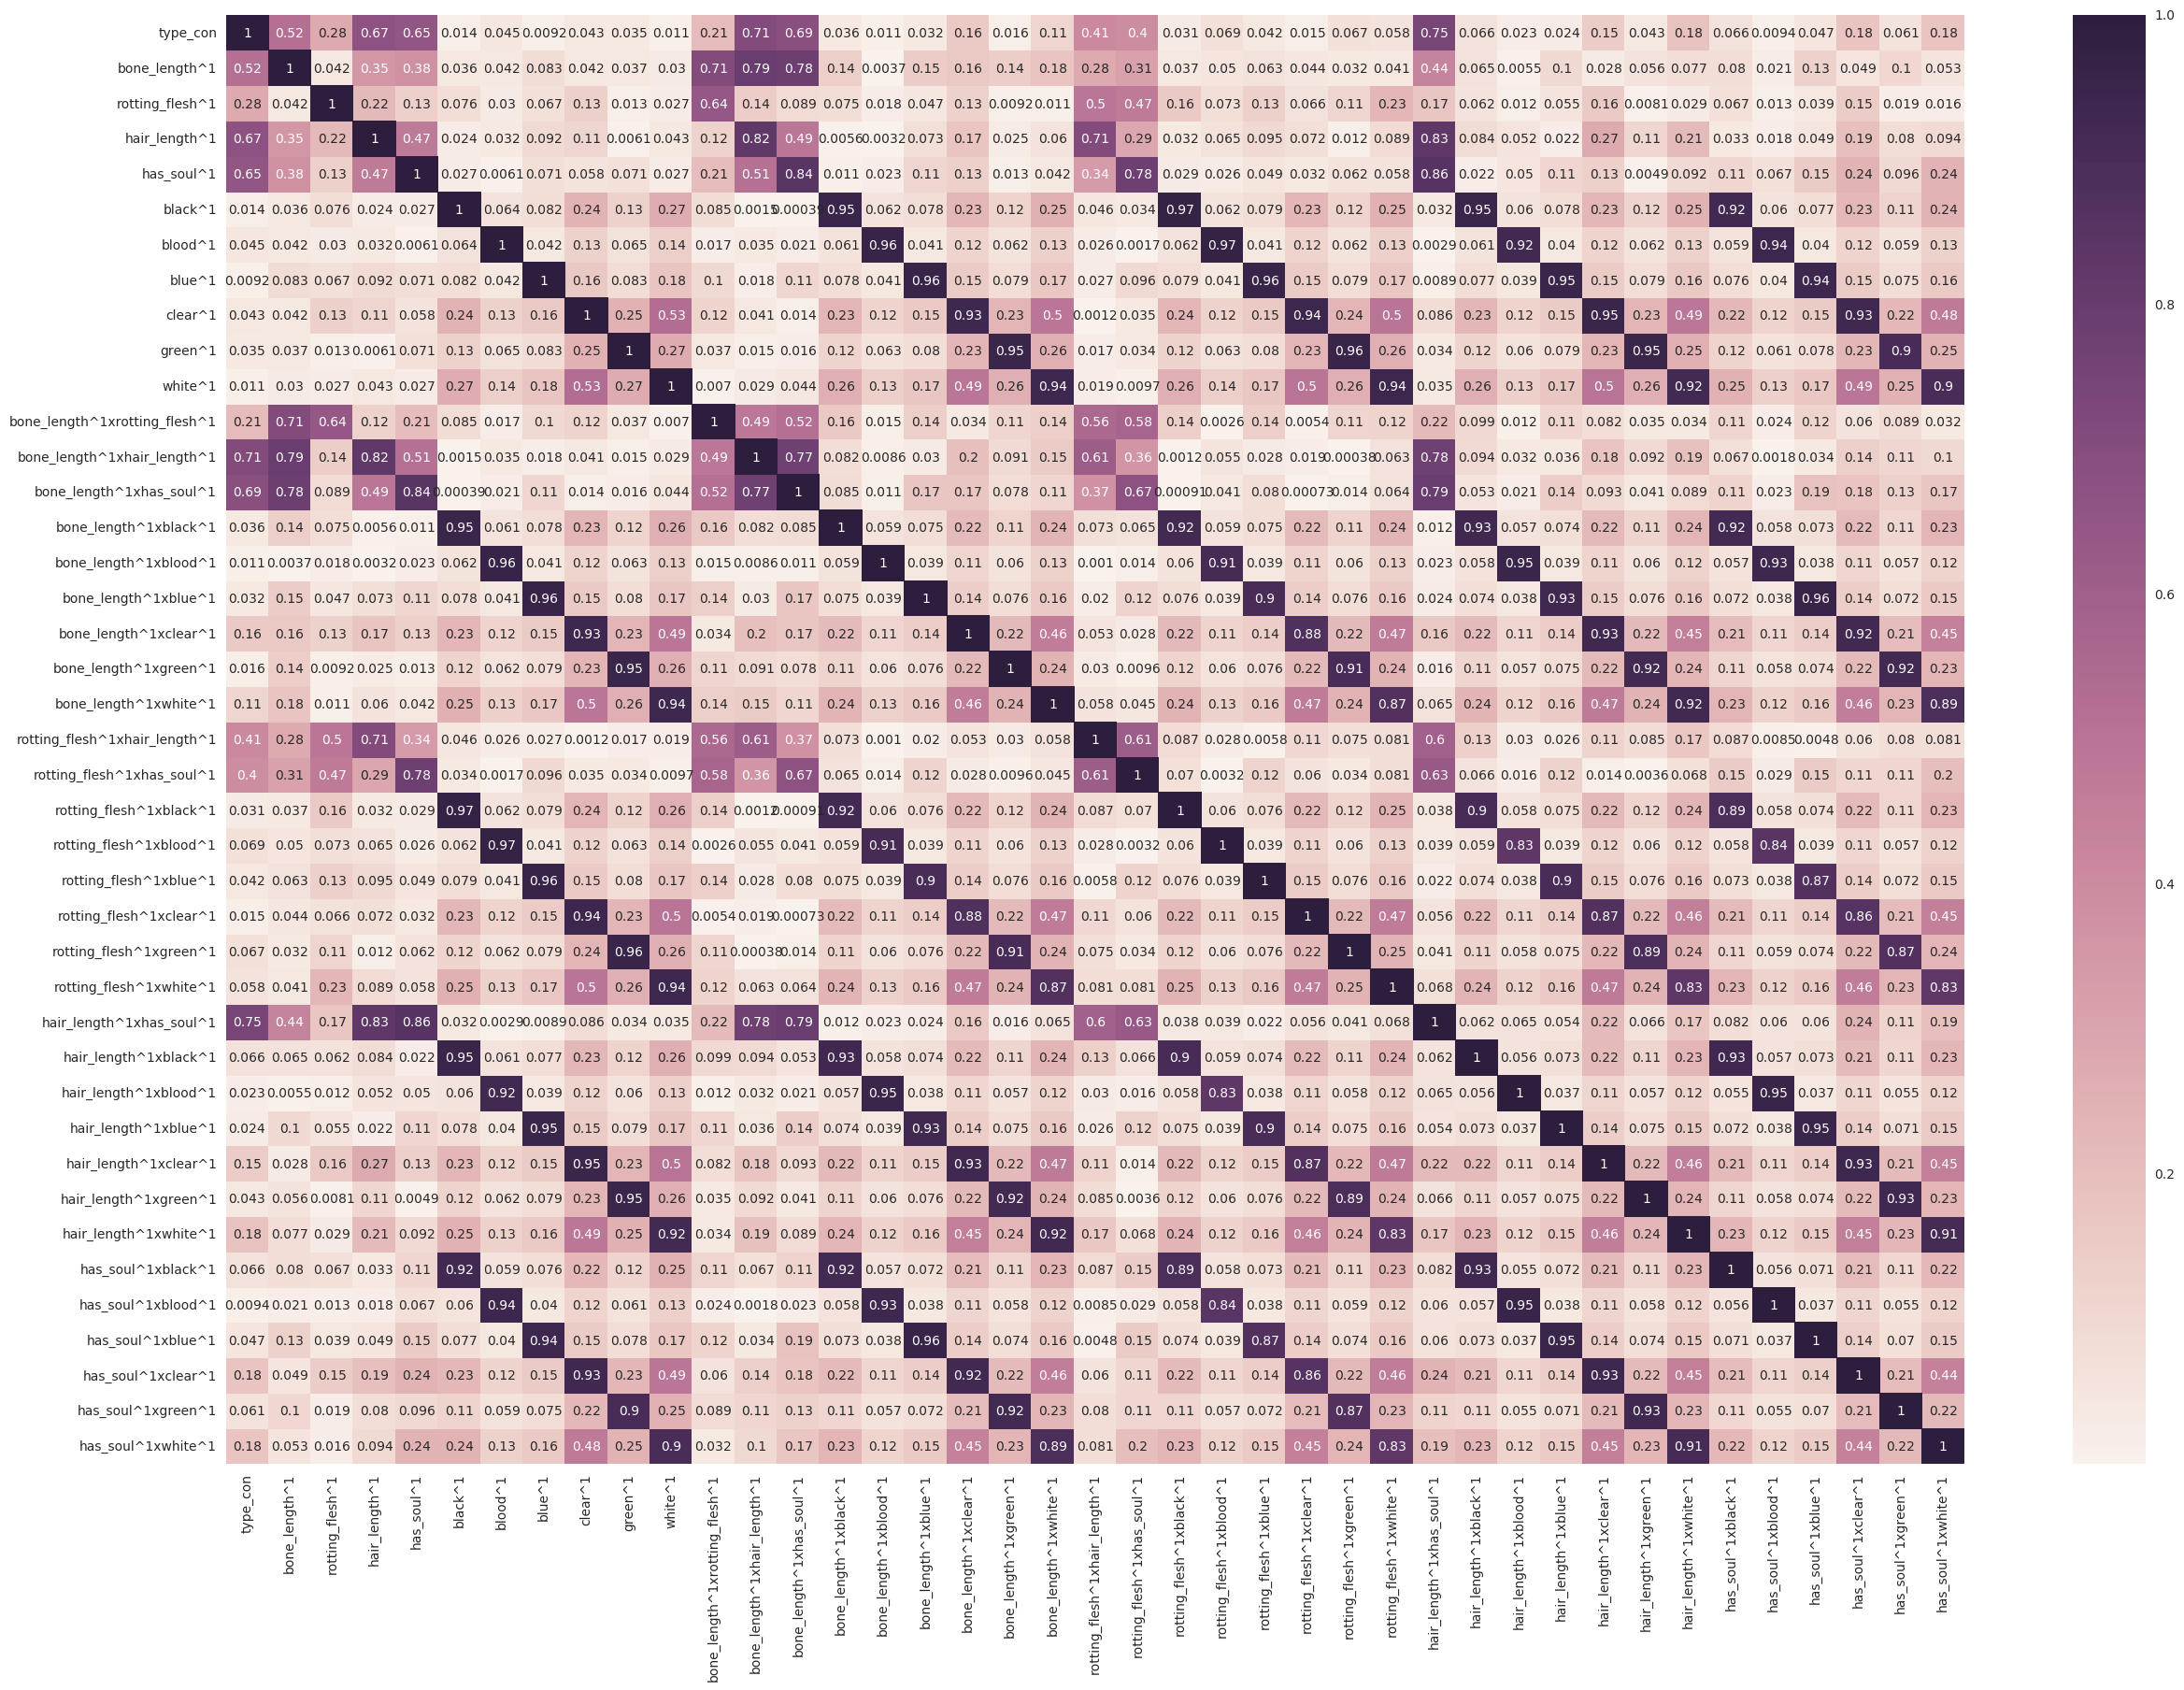

In [396]:
pd.set_option('display.max_columns', None)
train[train['id']==1]
cols=['type_con', 'bone_length^1', 'rotting_flesh^1', 'hair_length^1',
       'has_soul^1', 'black^1', 'blood^1', 'blue^1', 'clear^1', 'green^1',
       'white^1', 'bone_length^1xrotting_flesh^1',
       'bone_length^1xhair_length^1', 'bone_length^1xhas_soul^1',
       'bone_length^1xblack^1', 'bone_length^1xblood^1',
       'bone_length^1xblue^1', 'bone_length^1xclear^1',
       'bone_length^1xgreen^1', 'bone_length^1xwhite^1',
       'rotting_flesh^1xhair_length^1', 'rotting_flesh^1xhas_soul^1',
       'rotting_flesh^1xblack^1', 'rotting_flesh^1xblood^1',
       'rotting_flesh^1xblue^1', 'rotting_flesh^1xclear^1',
       'rotting_flesh^1xgreen^1', 'rotting_flesh^1xwhite^1',
       'hair_length^1xhas_soul^1', 'hair_length^1xblack^1',
       'hair_length^1xblood^1', 'hair_length^1xblue^1',
       'hair_length^1xclear^1', 'hair_length^1xgreen^1',
       'hair_length^1xwhite^1', 'has_soul^1xblack^1', 'has_soul^1xblood^1',
       'has_soul^1xblue^1', 'has_soul^1xclear^1', 'has_soul^1xgreen^1',
       'has_soul^1xwhite^1']



correlationMatrix=train.loc[:,cols].corr().abs()
plt.subplots(figsize=(30, 20))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()



In [318]:
categoricalColumns=['black', 'blood', 'blue', 'clear',
       'green', 'white']
corrCatMatrix =train[categoricalColumns].corr().abs()

s = corrCatMatrix.unstack()
#sortedSeries= s.order(kind="quicksort",ascending=False)
sortedSeries=s.sort_values(ascending=False)
print("Top 5 most correlated categorical feature pairs: \n")
print(sortedSeries[sortedSeries != 1.0][0:20])

#White and clear are correlated

Top 5 most correlated categorical feature pairs: 

white  clear    0.529061
clear  white    0.529061
green  white    0.273388
white  green    0.273388
black  white    0.269704
white  black    0.269704
green  clear    0.247047
clear  green    0.247047
       black    0.243719
black  clear    0.243719
white  blue     0.177770
blue   white    0.177770
clear  blue     0.160642
blue   clear    0.160642
blood  white    0.139893
white  blood    0.139893
clear  blood    0.126415
blood  clear    0.126415
green  black    0.125939
black  green    0.125939
dtype: float64


In [212]:
test.head()

bone_length^1  rotting_flesh^1  hair_length^1  has_soul^1  \
0       0.471774         0.387937       0.706087    0.698537   
1       0.427332         0.645024       0.565558    0.451462   
2       0.549602         0.491931       0.660387    0.449809   
3       0.638095         0.682867       0.471409    0.356924   
4       0.361762         0.583997       0.377256    0.276364   

   bone_length^1xrotting_flesh^1  bone_length^1xhair_length^1  \
0                       0.183019                     0.333114   
1                       0.275639                     0.241681   
2                       0.270366                     0.362950   
3                       0.435734                     0.300804   
4                       0.211268                     0.136477   

   bone_length^1xhas_soul^1  rotting_flesh^1xhair_length^1  \
0                  0.329552                       0.273917   
1                  0.192924                       0.364798   
2                  0.247216                       0.324865   
3                  0.227752                       0.321910   
4                  0.099978                       0.220317   

   rotting_flesh^1xhas_soul^1  hair_length^1xhas_soul^1  id  black  blood  \
0                    0.270988                  0.493228   3    1.0    0.0   
1                    0.291203                  0.255328   6    0.0    0.0   
2                    0.221275                  0.297048   9    1.0    0.0   
3                    0.243732                  0.168257  10    0.0    0.0   
4                    0.161396                  0.104260  13    1.0    0.0   

   blue  clear  green  white  
0   0.0    0.0    0.0    0.0  
1   0.0    0.0    0.0    1.0  
2   0.0    0.0    0.0    0.0  
3   0.0    0.0    0.0    1.0  
4   0.0    0.0    0.0    0.0

In [324]:
train.head()

type  type_con  bone_length^1  rotting_flesh^1  hair_length^1  \
0   Ghoul         0       0.354512         0.350839       0.465761   
1  Goblin         1       0.575560         0.425868       0.531401   
2   Ghoul         0       0.467875         0.354330       0.811616   
3   Ghoul         0       0.776652         0.508723       0.636766   
4   Ghost         2       0.566117         0.875862       0.418594   

   has_soul^1  bone_length^1xrotting_flesh^1  bone_length^1xhair_length^1  \
0    0.781142                       0.124377                     0.165118   
1    0.439899                       0.245113                     0.305853   
2    0.791225                       0.165783                     0.379735   
3    0.884464                       0.395101                     0.494546   
4    0.636438                       0.495840                     0.236973   

   bone_length^1xhas_soul^1  rotting_flesh^1xhair_length^1  \
0                  0.276924                       0.163407   
1                  0.253188                       0.226307   
2                  0.370195                       0.287580   
3                  0.686921                       0.323937   
4                  0.360298                       0.366630   

   rotting_flesh^1xhas_soul^1  hair_length^1xhas_soul^1  id  black  blood  \
0                    0.274055                  0.363825   0    0.0    0.0   
1                    0.187339                  0.233763   1    0.0    0.0   
2                    0.280355                  0.642171   2    1.0    0.0   
3                    0.449947                  0.563196   4    1.0    0.0   
4                    0.557432                  0.266409   5    0.0    0.0   

   blue  clear  green  white  
0   0.0    1.0    0.0    0.0  
1   0.0    0.0    1.0    0.0  
2   0.0    0.0    0.0    0.0  
3   0.0    0.0    0.0    0.0  
4   0.0    0.0    1.0    0.0

In [325]:
from sklearn.cross_validation import StratifiedShuffleSplit
cols=[i for i in train.columns if i!='type' and i!='type_con']
X=train.loc[:,cols]
test_rf=test.loc[:,cols]
y=train['type']
test_rf.head()

bone_length^1  rotting_flesh^1  hair_length^1  has_soul^1  \
0       0.471774         0.387937       0.706087    0.698537   
1       0.427332         0.645024       0.565558    0.451462   
2       0.549602         0.491931       0.660387    0.449809   
3       0.638095         0.682867       0.471409    0.356924   
4       0.361762         0.583997       0.377256    0.276364   

   bone_length^1xrotting_flesh^1  bone_length^1xhair_length^1  \
0                       0.183019                     0.333114   
1                       0.275639                     0.241681   
2                       0.270366                     0.362950   
3                       0.435734                     0.300804   
4                       0.211268                     0.136477   

   bone_length^1xhas_soul^1  rotting_flesh^1xhair_length^1  \
0                  0.329552                       0.273917   
1                  0.192924                       0.364798   
2                  0.247216                       0.324865   
3                  0.227752                       0.321910   
4                  0.099978                       0.220317   

   rotting_flesh^1xhas_soul^1  hair_length^1xhas_soul^1  id  black  blood  \
0                    0.270988                  0.493228   3    1.0    0.0   
1                    0.291203                  0.255328   6    0.0    0.0   
2                    0.221275                  0.297048   9    1.0    0.0   
3                    0.243732                  0.168257  10    0.0    0.0   
4                    0.161396                  0.104260  13    1.0    0.0   

   blue  clear  green  white  
0   0.0    0.0    0.0    0.0  
1   0.0    0.0    0.0    1.0  
2   0.0    0.0    0.0    0.0  
3   0.0    0.0    0.0    1.0  
4   0.0    0.0    0.0    0.0

In [326]:

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


def randomForest(X,y):

    pipe = Pipeline([('scaler', MinMaxScaler()), ('rf', RandomForestClassifier())])

    sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.25, random_state=0)
    for train_index, test_index in sss:
       X_train, X_test = X.iloc[train_index], X.iloc[test_index]
       y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    parameters = {'rf__n_estimators': [100,125,140,150],
              'rf__min_samples_split':[35,40,45,50],
             'rf__criterion' : ['gini', 'entropy'],
             'rf__max_features': ['auto', 'sqrt', 'log2']}

    rf=RandomForestClassifier()
    clf = GridSearchCV(pipe, parameters,cv=5,verbose=1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    print(accuracy_score(y_test,pred))
    return clf

In [327]:
clf=randomForest(X,y)
clf.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0.677419354839


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.5min finished


{'rf__criterion': 'gini',
 'rf__max_features': 'log2',
 'rf__min_samples_split': 40,
 'rf__n_estimators': 100}

                               importance
feature                                  
bone_length^1xhair_length^1         0.208
hair_length^1xhas_soul^1            0.191
bone_length^1xhas_soul^1            0.163
hair_length^1                       0.157
has_soul^1                          0.093
rotting_flesh^1                     0.051
bone_length^1                       0.042
rotting_flesh^1xhair_length^1       0.035
rotting_flesh^1xhas_soul^1          0.026
bone_length^1xrotting_flesh^1       0.024
id                                  0.005
blue                                0.002
black                               0.001
clear                               0.001
green                               0.001
white                               0.001
blood                               0.000


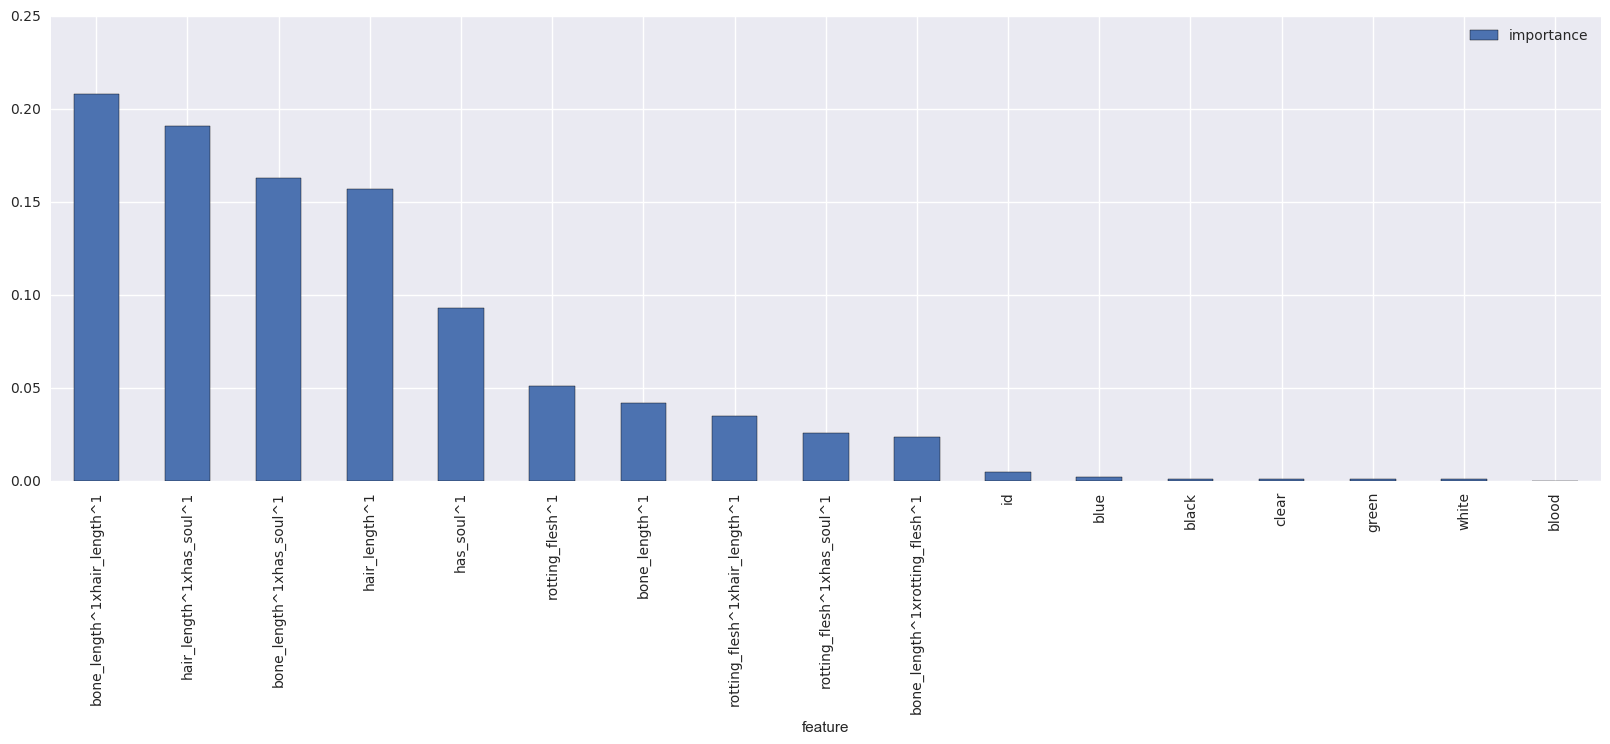

In [328]:
import numpy as np
rf=clf.best_estimator_
rf=rf.named_steps['rf']
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()

In [329]:
pred=clf.predict(test_rf)


In [330]:
def submitFile(pred,test_df,name):
    df=pd.DataFrame(pred)
    df['id']=test_df['id']
    df.columns=['type','id']
    df.to_csv(name,index=False,columns=['id','type'])
submitFile(pred,test,'RF')


In [331]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
def lr(X,y):
    sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.2, random_state=0)
    pipe = Pipeline([('scaler', MinMaxScaler()), ('lr', LogisticRegression())])

    for train_index, test_index in sss:
       X_train, X_test = X.iloc[train_index], X.iloc[test_index]
       y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    parameters = {
                  'lr__C' : [ 0.001,0.01, 1, 10, 100, 1000,100000,1000000],
                'lr__penalty':['l1','l2']
                 }

    
    clf = GridSearchCV(pipe, parameters,cv=5,verbose=1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    print(accuracy_score(y_test,pred))
    return clf


clf=lr(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.693333333333


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.9s finished


In [332]:

print(clf.best_params_)

pred=clf.predict(test_rf)
submitFile(pred,test,'LR')


{'lr__penalty': 'l2', 'lr__C': 1}


Accuracy in Test: 0.7805
F score: test 0.7813
Accuracy in Train: 0.9879
F score: train 0.9879


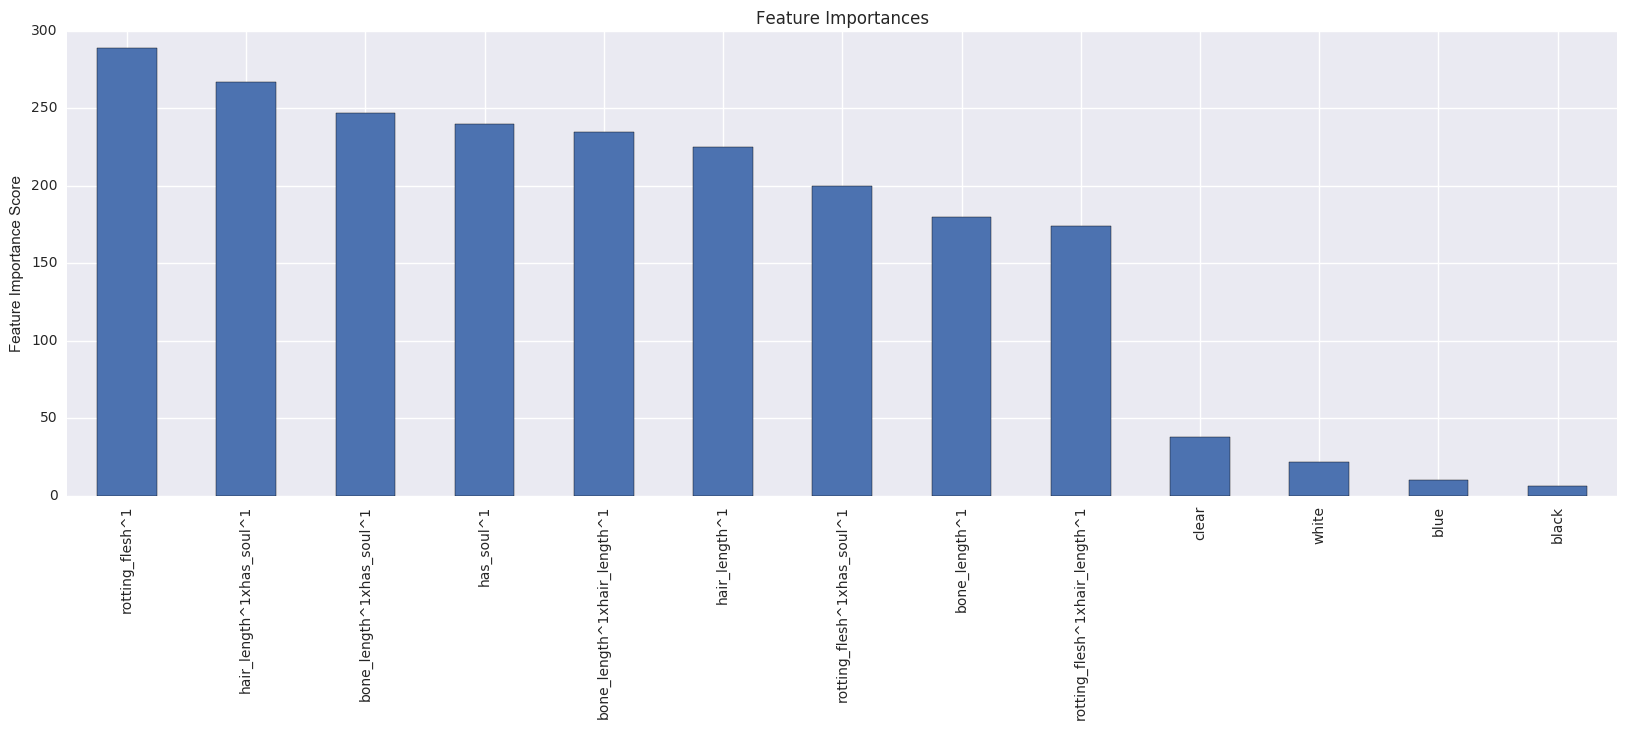

In [333]:
from sklearn.metrics import classification_report
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
    target='type_con'
    X_train, X_test, y_train, y_test = train_test_split(dtrain.loc[:,predictors], dtrain[target], stratify=y,test_size=0.33)
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class']=3
        xgtrain = xgb.DMatrix(X_train.values, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='mlogloss', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtest_predictions = alg.predict(X_test)
    dtrain_pred=alg.predict(X_train)
    #Print model report:
    print ("Accuracy in Test: %.4g" % metrics.accuracy_score(y_test, dtest_predictions))

    print ("F score: test %.4g" % metrics.f1_score(y_test,dtest_predictions,average='weighted'))
    
    print ("Accuracy in Train: %.4g" % metrics.accuracy_score(y_train, dtrain_pred))

    print ("F score: train %.4g" % metrics.f1_score(y_train,dtrain_pred,average='weighted'))

    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


    return alg



from sklearn.cross_validation import StratifiedShuffleSplit
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import xgboost as xgb

from sklearn.model_selection import train_test_split
predictors=[i for i in train.columns if i!='type' and i!='type_con' and i!='bone_length^1xrotting_flesh^1' and i!='green' and i!='id']
xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
alg=modelfit(xgb1, train, predictors)
pred=pd.DataFrame({'type':alg.predict(test.loc[:,predictors])})
pred['type']=pred['type'].apply(lambda x:reverse_dict[x])

submitFile(pred,test,'xgb-ghoul2.csv')



In [334]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

cols=[i for i in train.columns if i!='type' and i!='type_con']
X=train.loc[:,cols]
y=train.type


In [335]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.cross_validation import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.2, random_state=0)
for train_index, test_index in sss:
       X_train, X_test = X.iloc[train_index], X.iloc[test_index]
       y_train, y_test = y.iloc[train_index], y.iloc[test_index]

clf=gnb.fit(X_train,y_train)
pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))


0.626666666667


In [270]:

pred=clf.predict(test.loc[:,cols])

submitFile(pred,test,'GNBBase')


In [338]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
calibrated_clf1 = CalibratedClassifierCV(RandomForestClassifier())

log_reg1 = LogisticRegression()

gnb1 = GaussianNB()


calibrated_clf=CalibratedClassifierCV(RandomForestClassifier(criterion='gini',
 max_features= 'log2',
 min_samples_split= 49,
 n_estimators= 100))
log_reg1=LogisticRegression(C=1,penalty='l2')


xgb=xgb1
Vclf1 = VotingClassifier(estimators=[('LR', log_reg1), ('CRF', calibrated_clf1)], voting='hard')
Vclf = VotingClassifier(estimators=[('LR', log_reg1), ('CRF', calibrated_clf)],
                                      voting='soft', weights=[1,0.9])
sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.2, random_state=0)
for train_index, test_index in sss:
       X_train, X_test = X.iloc[train_index], X.iloc[test_index]
       y_train, y_test = y.iloc[train_index], y.iloc[test_index]

hard_predict=Vclf1.fit(X_train,y_train).predict(test.loc[:,cols])
soft_predict=Vclf.fit(X_train,y_train).predict(test.loc[:,cols])


In [340]:
submitFile(hard_predict,test,'ensemble')


In [341]:
train['type']

0       Ghoul
1      Goblin
2       Ghoul
3       Ghoul
4       Ghost
5      Goblin
6      Goblin
7       Ghoul
8       Ghost
9       Ghost
10     Goblin
11      Ghoul
12      Ghoul
13     Goblin
14     Goblin
15      Ghoul
16      Ghost
17      Ghoul
18      Ghoul
19      Ghost
20     Goblin
21      Ghoul
22     Goblin
23      Ghoul
24      Ghoul
25      Ghost
26     Goblin
27     Goblin
28     Goblin
29     Goblin
        ...  
341    Goblin
342     Ghoul
343    Goblin
344     Ghost
345     Ghoul
346    Goblin
347     Ghost
348    Goblin
349     Ghoul
350     Ghost
351    Goblin
352     Ghoul
353    Goblin
354     Ghost
355    Goblin
356    Goblin
357     Ghoul
358     Ghost
359     Ghoul
360     Ghoul
361     Ghoul
362    Goblin
363     Ghost
364    Goblin
365     Ghoul
366    Goblin
367     Ghost
368     Ghoul
369     Ghost
370     Ghoul
Name: type, dtype: object